## Correlation of COVID-19 cases in the states of Mexico by level of education

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import COVID-19 cases data

In [2]:
dfcvcases = pd.read_csv('../Data/week1analyzes.csv')
dfcvcases.head()

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
0,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
1,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
3,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
4,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388


#### Import level of education data

In [3]:
dflevschool = pd.read_excel('../Data/Educacion_04.xlsx', skiprows = range(0, 3))
dflevschool.head()

,Entidad federativa,Total,Sin escolaridad,Preescolar,Primaria,Secundaria,Estudios técnicos o comerciales con primaria terminada,Estudios técnicos o comerciales con secundaria terminada,Preparatoria o bachillerato,Normal básica,Estudios técnicos o comerciales con preparatoria terminada,Licenciatura o equivalente,Posgrado,No especificado
0,Estados Unidos Mexicanos,119976584.0,7701507.0,6110435.0,33253208.0,29426059.0,354724.0,1244138.0,21149168.0,123608.0,1453857.0,16777488.0,2055605.0,326787.0
1,Aguascalientes,1352235.0,63957.0,72236.0,346807.0,361191.0,4705.0,14150.0,229410.0,1597.0,20758.0,207540.0,27203.0,2681.0
2,Baja California,3610844.0,180275.0,155091.0,872803.0,945609.0,12001.0,30223.0,773443.0,2847.0,37916.0,521809.0,63133.0,15694.0
3,Baja California Sur,758642.0,36121.0,38810.0,184093.0,182005.0,2653.0,8057.0,165452.0,762.0,9603.0,116667.0,11975.0,2444.0
4,Campeche,878528.0,68195.0,49037.0,233844.0,218926.0,1948.0,7641.0,143267.0,1182.0,9373.0,127182.0,16002.0,1931.0


In [4]:
dfls=dflevschool.loc[:, ['Entidad federativa', 'Total', 'Sin escolaridad', 'Primaria', 'Preparatoria o bachillerato', 'Licenciatura o equivalente', 'Posgrado']]

In [5]:
dfls.head()

,Entidad federativa,Total,Sin escolaridad,Primaria,Preparatoria o bachillerato,Licenciatura o equivalente,Posgrado
0,Estados Unidos Mexicanos,119976584.0,7701507.0,33253208.0,21149168.0,16777488.0,2055605.0
1,Aguascalientes,1352235.0,63957.0,346807.0,229410.0,207540.0,27203.0
2,Baja California,3610844.0,180275.0,872803.0,773443.0,521809.0,63133.0
3,Baja California Sur,758642.0,36121.0,184093.0,165452.0,116667.0,11975.0
4,Campeche,878528.0,68195.0,233844.0,143267.0,127182.0,16002.0


In [6]:
dfls.rename(columns={'Entidad federativa': 'state', 'Sin escolaridad': 'not_school', 'Primaria': 'elementary_school', 'Preparatoria o bachillerato': 'high_school', 'Licenciatura o equivalente': 'bachelor', 'Posgrado': 'postgraduate', 'Total': 'Total'}, inplace=True)

In [7]:
dfls.head()

,state,Total,not_school,elementary_school,high_school,bachelor,postgraduate
0,Estados Unidos Mexicanos,119976584.0,7701507.0,33253208.0,21149168.0,16777488.0,2055605.0
1,Aguascalientes,1352235.0,63957.0,346807.0,229410.0,207540.0,27203.0
2,Baja California,3610844.0,180275.0,872803.0,773443.0,521809.0,63133.0
3,Baja California Sur,758642.0,36121.0,184093.0,165452.0,116667.0,11975.0
4,Campeche,878528.0,68195.0,233844.0,143267.0,127182.0,16002.0


In [8]:
dfls.query('state != "Estados Unidos Mexicanos"', inplace=True)
dfls.head()

,state,Total,not_school,elementary_school,high_school,bachelor,postgraduate
1,Aguascalientes,1352235.0,63957.0,346807.0,229410.0,207540.0,27203.0
2,Baja California,3610844.0,180275.0,872803.0,773443.0,521809.0,63133.0
3,Baja California Sur,758642.0,36121.0,184093.0,165452.0,116667.0,11975.0
4,Campeche,878528.0,68195.0,233844.0,143267.0,127182.0,16002.0
5,Coahuila de Zaragoza,2980244.0,135915.0,705577.0,521913.0,429571.0,53651.0


In [9]:
dfls['state']=dfls['state'].str.upper()
dfls.head()

,state,Total,not_school,elementary_school,high_school,bachelor,postgraduate
1,AGUASCALIENTES,1352235.0,63957.0,346807.0,229410.0,207540.0,27203.0
2,BAJA CALIFORNIA,3610844.0,180275.0,872803.0,773443.0,521809.0,63133.0
3,BAJA CALIFORNIA SUR,758642.0,36121.0,184093.0,165452.0,116667.0,11975.0
4,CAMPECHE,878528.0,68195.0,233844.0,143267.0,127182.0,16002.0
5,COAHUILA DE ZARAGOZA,2980244.0,135915.0,705577.0,521913.0,429571.0,53651.0


In [10]:
dfls = dfls.iloc[0:32,:].copy()
dfls.sort_values(by=['state'], ascending = True, inplace=True)
dfls.at[9,'state']='DISTRITO FEDERAL'
dfls.at[5,'state']='COAHUILA'
dfls.at[15,'state']='MEXICO'
dfls.at[16,'state']='MICHOACAN'
dfls.at[30,'state']='VERACRUZ'
dfls.at[22,'state']='QUERETARO'
dfls.at[24,'state']='SAN LUIS POTOSI'
dfls.at[31,'state']='YUCATAN'
dfls.at[19,'state']='NUEVO LEON'
dfls.sort_values(by=['state'], ascending = True, inplace=True)

In [11]:
dfls.head()

,state,Total,not_school,elementary_school,high_school,bachelor,postgraduate
1,AGUASCALIENTES,1352235.0,63957.0,346807.0,229410.0,207540.0,27203.0
2,BAJA CALIFORNIA,3610844.0,180275.0,872803.0,773443.0,521809.0,63133.0
3,BAJA CALIFORNIA SUR,758642.0,36121.0,184093.0,165452.0,116667.0,11975.0
4,CAMPECHE,878528.0,68195.0,233844.0,143267.0,127182.0,16002.0
7,CHIAPAS,5181929.0,699526.0,1913596.0,667797.0,434331.0,47817.0


In [12]:
dfls['pct_not_school']=dfls['not_school']/dfls['Total']*100
dfls['pct_elementary_school']=dfls['elementary_school']/dfls['Total']*100
dfls['pct_high_school']=dfls['high_school']/dfls['Total']*100
dfls['pct_bachelor']=dfls['bachelor']/dfls['Total']*100
dfls['pct_postgraduate']=dfls['postgraduate']/dfls['Total']*100

In [13]:
dfls.head()

,state,Total,not_school,elementary_school,high_school,bachelor,postgraduate,pct_not_school,pct_elementary_school,pct_high_school,pct_bachelor,pct_postgraduate
1,AGUASCALIENTES,1352235.0,63957.0,346807.0,229410.0,207540.0,27203.0,4.729725,25.646947,16.965246,15.347924,2.011707
2,BAJA CALIFORNIA,3610844.0,180275.0,872803.0,773443.0,521809.0,63133.0,4.992600,24.171717,21.420006,14.451164,1.748428
3,BAJA CALIFORNIA SUR,758642.0,36121.0,184093.0,165452.0,116667.0,11975.0,4.761271,24.266123,21.808969,15.378400,1.578478
4,CAMPECHE,878528.0,68195.0,233844.0,143267.0,127182.0,16002.0,7.762416,26.617706,16.307619,14.476716,1.821456
7,CHIAPAS,5181929.0,699526.0,1913596.0,667797.0,434331.0,47817.0,13.499336,36.928256,12.887035,8.381647,0.922764


In [14]:
dflspct=dfls.loc[:, ['state', 'pct_not_school', 'pct_elementary_school', 'pct_high_school', 'pct_bachelor', 'pct_postgraduate', 'Total']]
dflspct.head()

,state,pct_not_school,pct_elementary_school,pct_high_school,pct_bachelor,pct_postgraduate,Total
1,AGUASCALIENTES,4.729725,25.646947,16.965246,15.347924,2.011707,1352235.0
2,BAJA CALIFORNIA,4.992600,24.171717,21.420006,14.451164,1.748428,3610844.0
3,BAJA CALIFORNIA SUR,4.761271,24.266123,21.808969,15.378400,1.578478,758642.0
4,CAMPECHE,7.762416,26.617706,16.307619,14.476716,1.821456,878528.0
7,CHIAPAS,13.499336,36.928256,12.887035,8.381647,0.922764,5181929.0


#### Merge Dataframes (COVID Cases / level of education)

In [15]:
dfAll = pd.merge(dfcvcases, dflspct,  on='state')
dfAll.head()

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days,pct_not_school,pct_elementary_school,pct_high_school,pct_bachelor,pct_postgraduate,Total
0,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964,4.729725,25.646947,16.965246,15.347924,2.011707,1352235.0
1,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503,4.992600,24.171717,21.420006,14.451164,1.748428,3610844.0
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704,4.761271,24.266123,21.808969,15.378400,1.578478,758642.0
3,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424,7.762416,26.617706,16.307619,14.476716,1.821456,878528.0
4,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388,13.499336,36.928256,12.887035,8.381647,0.922764,5181929.0


In [16]:
dfAll.shape

(32, 16)

<AxesSubplot:>

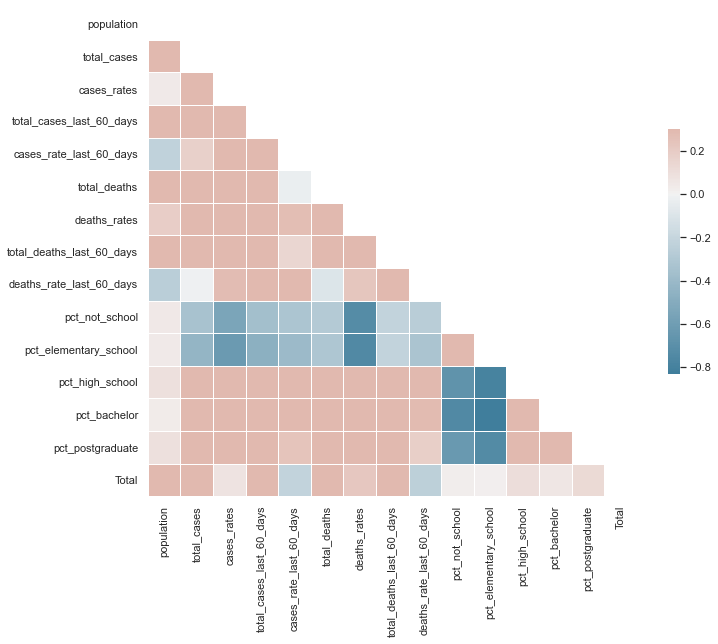

In [17]:
# Compute the correlation matrix
corr = dfAll.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

dfAll2 = dfAll.set_index("state", drop = True)
dfAll2.head()

dflsPue=dflspct2.loc[['PUEBLA'], : ]
dflsPue

#### % Not school vs Cases Rate - Regression Plot 

plt.figure(figsize=(14,10))
sns.regplot(x="pct_not_school", y="cases_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### % Read-Write people vs Deaths Rate - Regression Plot 

plt.figure(figsize=(14,10))
sns.regplot(x="pct_read_write", y="deaths_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### % Not Read-Write people vs Cases Rate - Regression Plot 

plt.figure(figsize=(14,10))
sns.regplot(x="pct_not_read_write", y="cases_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### % Not Read-Write people vs Deaths Rate - Regression Plot 

plt.figure(figsize=(14,10))
sns.regplot(x="pct_not_read_write", y="deaths_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

dfAll["pct_read_write"].describe()

#### % Read-Write, % Not Read-Write, Cases Rate, Deaths Rate - Pairs Plot 

dfpairc=dfAll[["pct_read_write", "pct_not_read_write", "cases_rates", "deaths_rates"]]
plt.figure(figsize=(10,7))
sns.pairplot(dfpairc)
sns.set_context('paper', font_scale=1)

#### Descriptive statistics (Read-Write, % Not Read-Write, Cases Rate, Deaths Rate)

dfAll[['pct_read_write', 'pct_not_read_write', 'cases_rates', 'deaths_rates']].describe()